##### The aim of this model is to create a classifier that would be able to identify healthy cotton plants from the non-healthy cotton plants by examming both the leaves and other part of the plant.

##### Data Set : The data used is gotten from the kaggle data science website, the data set name is called Cotton Disease.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.activations import softmax, relu
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import categorical_crossentropy

In [3]:
abspath = os.path.abspath('./')

train_dir = os.path.join(abspath, 'train/')
test_dir = os.path.join(abspath, 'test/')
valid_dir = os.path.join(abspath, 'val/')

In [4]:
train_gen = ImageDataGenerator(rescale=1./225)
test_gen = ImageDataGenerator(rescale=1./225)


train_data = train_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32)
test_data = test_gen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=20, shuffle=False)
valid_data = test_gen.flow_from_directory(valid_dir, target_size=(224, 224), batch_size=20, shuffle=False)

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [5]:
model = models.Sequential()

input_shape = (224, 224, 3)

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), kernel_regularizer=l2(1e-4),
                        activation=relu, padding='same',input_shape=input_shape))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), kernel_regularizer=l2(1e-4), activation=relu))
model.add(layers.MaxPooling2D())

# layer 2
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), kernel_regularizer=l2(1e-4), activation=relu))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), kernel_regularizer=l2(1e-4), activation=relu))
model.add(layers.MaxPooling2D())

# layer 3
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), kernel_regularizer=l2(1e-4), activation=relu))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), kernel_regularizer=l2(1e-4), activation=relu))
model.add(layers.MaxPooling2D())

# layer 4
model.add(layers.Flatten())
model.add(layers.Dense(512, activation=relu))
model.add(layers.Dense(512*2, activation=relu))
model.add(layers.Dense(4, activation=softmax))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 128)       7

In [8]:
checkpoint = callbacks.ModelCheckpoint('cotton1.weights.model.hdf5', save_best_only=True, verbose=1)

model.compile(optimizer=RMSprop(learning_rate=1e-4), loss=categorical_crossentropy, metrics=['accuracy'])

history = model.fit(train_data, epochs=20, steps_per_epoch=10,
                    callbacks=checkpoint, validation_data=valid_data,validation_steps=10)

Epoch 1/20
10/10 [==============================] - 108s 11s/step - loss: 1.5126 - accuracy: 0.4788 - val_loss: 1.3402 - val_accuracy: 0.3900

Epoch 00001: val_loss improved from inf to 1.34018, saving model to cotton1.weights.model.hdf5
Epoch 2/20
10/10 [==============================] - 106s 11s/step - loss: 1.2680 - accuracy: 0.4700 - val_loss: 1.2358 - val_accuracy: 0.3900

Epoch 00002: val_loss improved from 1.34018 to 1.23578, saving model to cotton1.weights.model.hdf5
Epoch 3/20
10/10 [==============================] - 106s 11s/step - loss: 1.2148 - accuracy: 0.4415 - val_loss: 1.1209 - val_accuracy: 0.4300

Epoch 00003: val_loss improved from 1.23578 to 1.12088, saving model to cotton1.weights.model.hdf5
Epoch 4/20
10/10 [==============================] - 106s 11s/step - loss: 1.1292 - accuracy: 0.4966 - val_loss: 1.0905 - val_accuracy: 0.5650

Epoch 00004: val_loss improved from 1.12088 to 1.09048, saving model to cotton1.weights.model.hdf5
Epoch 5/20
10/10 [==================

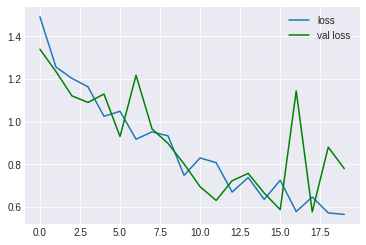

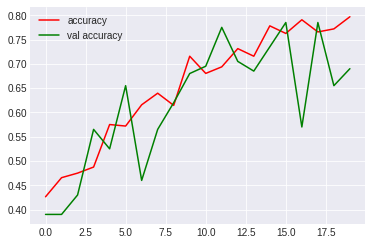

In [9]:
plt.style.use('seaborn-darkgrid')
epochs = len(history.history['loss'])

loss = history.history['loss']
acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(loss, label='loss')
plt.plot(val_loss, 'g', label='val loss')
plt.legend()

plt.figure()
plt.plot(acc, 'r', label='accuracy')
plt.plot(val_acc, 'g', label='val accuracy')
plt.legend()
plt.show()

In [13]:
score = model.evaluate(test_data, callbacks=checkpoint)
print(f'loss:{score[0]}')
print(f'Accuracy:{score[1]}')

6/6 [==============================] - 10s 2s/step - loss: 0.8212 - accuracy: 0.6792
loss:0.8211892247200012
Accuracy:0.6792452931404114
